In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Understanding & Preparation

## Data Semantics
 • Introduce the variables with their meaning and characteristics;

In [9]:
df = pd.read_csv('train.csv')

In [10]:
df.head()

It's analyzed a dataset about films and tv series. There are 23 variables:
- originalTitle: 		Original title, in the original language.
- runtimeMinutes: 		Primary runtime of the title, in minutes.
- isAdult: 			Whether or not the title is for adult. 0: non-adult title; 1: adult title.
- startYear: 			Represents the release year of a title. In the case of TV Series, it is the series start year.
- endYear: 			TV Series end year.
- numVotes: 			Number of votes the title has received.
- numRegions: 	 		The regions number for this version of the title.
- worstRating: 			Worst title rating.
- bestRating: 			Best title rating.
- canHaveEpisodes:		Whether or not the title can have episodes.
- isRatable: 			Whether or not the title can be rated by users.
- totalImages:			Total Number of Images for the title within the IMDb title page.
- totalVideos: 			Total Number of Videos for the title within the IMDb title page.
- totalCredits:			Total Number of Credits for the title.
- criticReviewsTotal:		Total Number of Critic Reviews.
- awardWins:			Number of awards the title won.
- awardNominationsExcludeWins: 	Number of award nominations excluding wins.
- titleType:			The type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
- rating:			IMDB title rating class.
- ratingCount: 			The total number of user ratings submitted for the title.
- countryOfOrigin: 		The country where the title was primarily produced.
- genres: 			The genre(s) associated with the title (e.g., drama, comedy, action).
- userReviewsTotal  		Total Number of Users Reviews.

We've chosen the following variables:


*   
*   



## Distribution of the variables and statistics
• Explore (single, pairs of…) variables quantitatively (e.g., statistics, distributions);

In [11]:
numeric_df = df.select_dtypes(include=[np.number])

# Calcolare le statistiche descrittive
desc = numeric_df.describe().round(2)

# Calcolare il Coefficiente di Variazione (CV)
cv = (numeric_df.std() / numeric_df.mean()).round(2)
cv_df = pd.DataFrame(cv).T
cv_df.index = ['CV']

# Aggiungere il CV alle statistiche descrittive
desc = pd.concat([desc, cv_df])

desc

From the general statistics it's see that for awardWins the mean is 0.49 while the median is 0. It's highlighted that at least the 75% of units never won an award as it can be see from the value of the third quartile.
For the numVotes the mean is far from the median and also from the third quartile, so there are many title with a low number of votes and some units with a lot of ratings.
Instead for totalCredits the mean and the median are not so far and 75% of the title have at least 65 credits.
For the total of critic and user reviews it can be see that as before the median is 0 while the mean have an higher value, so 50% of the films have 0 reviews. The user reviews have in mean an higher value. 

In [12]:
plt.hist(df['awardWins'], bins = 100)
plt.xlabel('Award Wins')
plt.ylabel('Number of units')
plt.show()

## Assessing data quality
• Are present errors, outliers, missing values, semantic inconsistencies, etc?

In [13]:
df.isnull().sum()

originalTitle                     0
rating                            0
startYear                         0
endYear                           0
runtimeMinutes                    0
awardWins                      2618
numVotes                          0
worstRating                       0
bestRating                        0
totalImages                       0
totalVideos                       0
totalCredits                      0
criticReviewsTotal                0
titleType                         0
awardNominationsExcludeWins       0
canHaveEpisodes                   0
isRatable                         0
isAdult                           0
numRegions                        0
userReviewsTotal                  0
ratingCount                       0
countryOfOrigin                   0
genres                            0
dtype: int64

There are 2618 missing values in the variable 'awardWins'. The other variables have no missing values.

c:\Users\Lavigi\programmi\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Lavigi\programmi\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\Lavigi\programmi\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


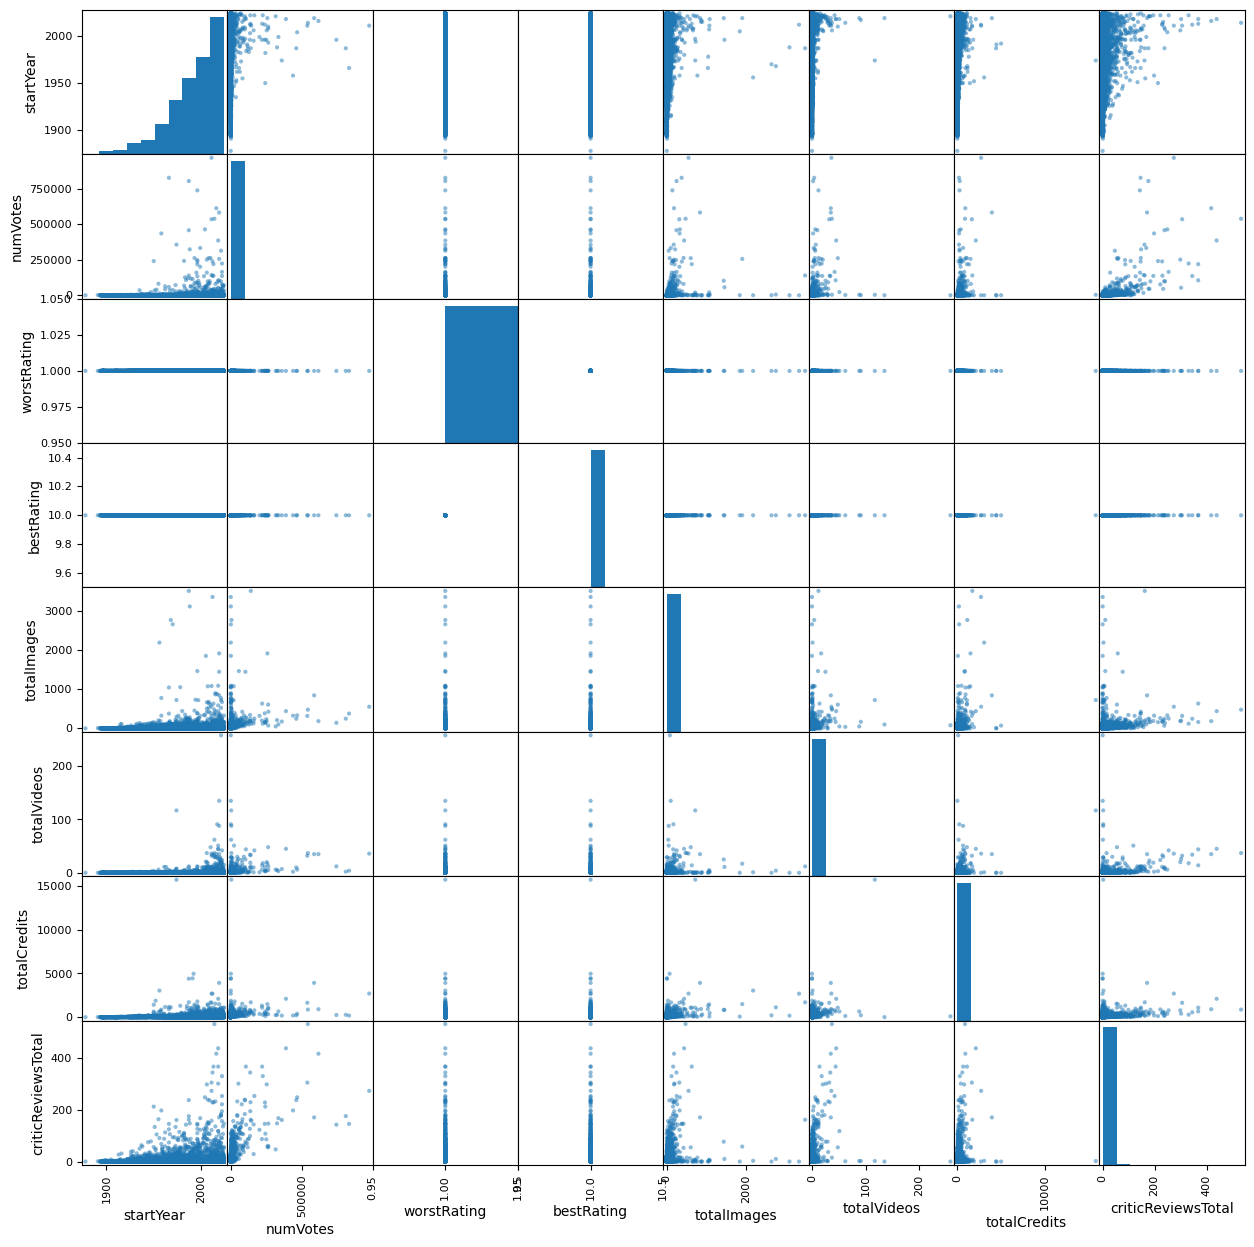

In [14]:
pd.plotting.scatter_matrix(df[['startYear', 'numVotes', 'worstRating', 'bestRating', 'totalImages',	'totalVideos', 'totalCredits','criticReviewsTotal']], figsize=(15, 15))
plt.show()

## Variable transformations
 • Is it better to use for further modules transformed variables (e.g., log-transformated)?

## Pairwise correlations and eventual elimination of variables
 • Matrix correlation (analyse high correlated variables)

In [15]:
df['numVotes'].corr(df['ratingCount'])

0.9999999334405569

There is a high correlation between the 'numVotes' variable and the 'ratingCount' variable. We can say that they represent the same value in the dataset, so we can eliminate one of these two variables.

In [16]:
import jinja2 as tuzia
df.corr(numeric_only = True, method="pearson").style.background_gradient(cmap='Blues', vmin=-1, vmax=1)

,startYear,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount
startYear,1.000000,0.076407,0.019135,nan,nan,0.013880,0.059189,0.080991,0.024758,0.077200,0.128822,nan,0.015654,-0.059845,0.019577,0.019151
awardWins,0.076407,1.000000,0.351491,nan,nan,0.208862,0.178123,0.191245,0.361878,0.693788,0.026345,nan,-0.016394,0.281677,0.281566,0.351511
numVotes,0.019135,0.351491,1.000000,nan,nan,0.244703,0.255338,0.244675,0.673351,0.432749,0.004030,nan,-0.011618,0.454055,0.752175,1.000000
worstRating,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bestRating,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
totalImages,0.013880,0.208862,0.244703,nan,nan,1.000000,0.167539,0.342938,0.253509,0.303263,0.138943,nan,-0.025093,0.288993,0.275474,0.244738
totalVideos,0.059189,0.178123,0.255338,nan,nan,0.167539,1.000000,0.353334,0.327225,0.315425,0.066168,nan,-0.014218,0.247112,0.280888,0.255368
totalCredits,0.080991,0.191245,0.244675,nan,nan,0.342938,0.353334,1.000000,0.253171,0.330074,0.156561,nan,-0.036051,0.264634,0.305917,0.244704
criticReviewsTotal,0.024758,0.361878,0.673351,nan,nan,0.253509,0.327225,0.253171,1.000000,0.505829,-0.036630,nan,-0.018679,0.658574,0.645238,0.673388
awardNominationsExcludeWins,0.077200,0.693788,0.432749,nan,nan,0.303263,0.315425,0.330074,0.505829,1.000000,0.064031,nan,-0.016178,0.373242,0.420926,0.432813
